# Example code to use preprocess.py

In [1]:
import sys
sys.path.append("../..")

from lunar_crater_age_logic.preprocess import load_data
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
#Select path of desire split (train, val or test)
DATA_DIR = Path("../../raw_data/train")

In [3]:
#Load the function
"""Args:
        data_dir: Path to data folder
        balanced: True for balanced subset (prototype), false for all data (Final training)
        use_weighted_sampling: Apply weighted sampling for imbalance data (only works when balanced = false)
        batch_size: Number of images per batch
        samples_per_class: For balanced mode only -> default value = 358 (no. of ejecta class)
        seed: Random seed for reproducibility
        use_zscore: if True use z-score normalization otherwise just / 255.0
"""
train_loader = load_data(DATA_DIR, balanced=True, batch_size=9, use_zscore= False)
images, labels = next(iter(train_loader))

Creating BALANCED dataset (358 per class)
Balanced subset: 358 samples per class
Total: 1074 images
Classes: ['ejecta', 'oldcrater', 'none']
Total images: 1074


In [4]:
print(f"Batch loaded")
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")
print(f"Image range: {images.min():.2f} to {images.max():.2f}")
print(f"First labels: {labels}")

Batch loaded
Images shape: (9, 227, 227, 3)
Labels shape: (9,)
Image range: 0.00 to 1.00
First labels: [1 1 2 2 1 2 2 0 2]


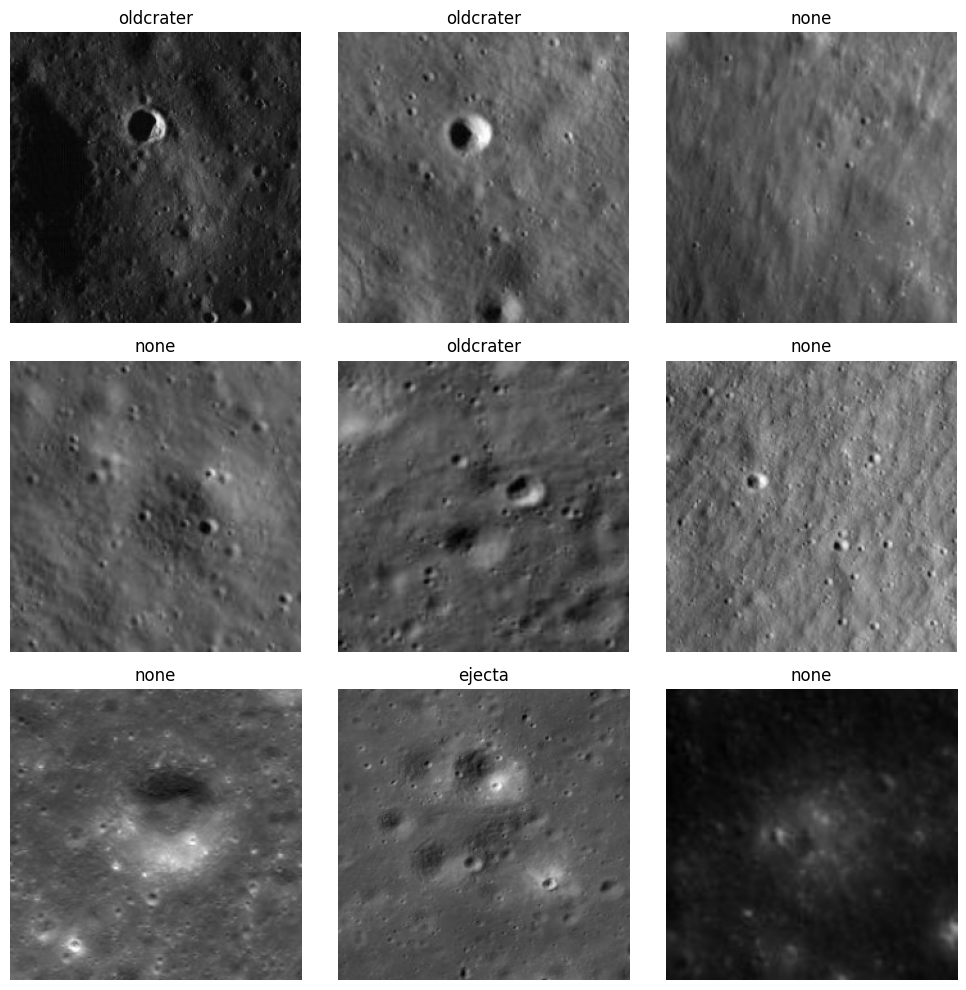

In [6]:
#Plot raw normalized images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
class_names = ["ejecta", "oldcrater", "none"]

for i, ax in enumerate(axes.flat):
    if i < 9:
        #Show normalize image directly
        ax.imshow(images[i])
        ax.set_title(class_names[labels[i]])
        ax.axis("off")
plt.tight_layout()
plt.show()